# Laboratorio 6 - Clasificación de Malware con DL

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-wfrz4fbn because the default path (/home/sebas/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
2023-05-01 23:05:54.257108: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-01 23:05:54.267400: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 23:05:54.318592: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-01 23:05:54.319250: I tensorflow/core/platform/cpu_feature_guard.cc:182] 

In [2]:
def load_data():
    DIRECTORY = os.getcwd()
    DIRECTORY = os.path.join(DIRECTORY, "malimg_paper_dataset_imgs")
    class_names = []
    labels = []
    images = []
    i = 0
    for folder in os.listdir(DIRECTORY):
        folder_directory = os.path.join(DIRECTORY, folder)
        if not os.path.isdir(folder_directory): continue
        class_names.append(folder)
        
        for file in os.listdir(folder_directory):
            img_path = os.path.join(folder_directory, file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (150, 150))
            labels.append(i)
            images.append(image)
            
        i += 1
    
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
    
    return class_names, images, labels

In [3]:
class_names, images, labels = load_data()

In [27]:
l_names, l_counts = np.unique(labels, return_counts=True)
l_names = [class_names[l_id] for l_id in l_names]
for i in range(len(l_names)):
    print(l_names[i], l_counts[i])

Lolyda.AT 159
VB.AT 408
C2LOP.P 146
Lolyda.AA3 123
Yuner.A 800
Rbot!gen 158
C2LOP.gen!g 200
Wintrim.BX 97
Dontovo.A 162
Malex.gen!J 136
Swizzor.gen!I 132
Allaple.A 2949
Instantaccess 431
Autorun.K 106
Lolyda.AA1 213
Dialplatform.B 177
Skintrim.N 80
Agent.FYI 116
Swizzor.gen!E 128
Allaple.L 1591
Lolyda.AA2 184
Fakerean 381
Obfuscator.AD 142
Alueron.gen!J 198
Adialer.C 122


In [6]:
images, labels = shuffle(images, labels, random_state=123)

In [7]:
breakpoint = int(len(images)*0.7)

In [8]:
train_images = images[:breakpoint]
test_images = images[breakpoint:]
train_labels = labels[:breakpoint]
test_labels = labels[breakpoint:]

In [9]:
print(train_labels.shape)
train_images[0].shape


(6537,)


(150, 150, 3)

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(len(class_names), activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=6, validation_split=0.2)

Epoch 1/6
41/41 [==============================] - 19s 448ms/step - loss: 191.3834 - accuracy: 0.5162 - val_loss: 0.4316 - val_accuracy: 0.9029
Epoch 2/6
41/41 [==============================] - 19s 454ms/step - loss: 0.2023 - accuracy: 0.9468 - val_loss: 0.2309 - val_accuracy: 0.9465
Epoch 3/6
41/41 [==============================] - 18s 446ms/step - loss: 0.0229 - accuracy: 0.9952 - val_loss: 0.2419 - val_accuracy: 0.9427
Epoch 4/6
41/41 [==============================] - 19s 461ms/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.2198 - val_accuracy: 0.9495
Epoch 5/6
41/41 [==============================] - 18s 442ms/step - loss: 4.8936e-04 - accuracy: 1.0000 - val_loss: 0.2135 - val_accuracy: 0.9580
Epoch 6/6
41/41 [==============================] - 19s 452ms/step - loss: 1.4926e-04 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9572


In [16]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label='acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='val_acc')
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label='loss')
    plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()

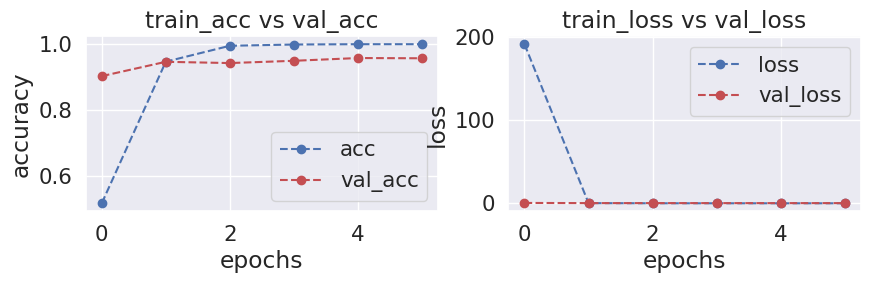

In [17]:
plot_accuracy_loss(history)

In [18]:
test_loss = model.evaluate(test_images, test_labels)

88/88 [==============================] - 2s 27ms/step - loss: 0.2567 - accuracy: 0.9515


In [21]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

88/88 [==============================] - 2s 27ms/step


In [22]:
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.97      1.00      0.99       113
           2       0.52      0.38      0.44        42
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00       225
           5       0.91      0.93      0.92        43
           6       0.81      0.83      0.82        77
           7       1.00      0.59      0.74        34
           8       1.00      1.00      1.00        38
           9       0.92      0.51      0.66        47
          10       0.53      0.55      0.54        42
          11       0.94      1.00      0.97       905
          12       1.00      1.00      1.00       135
          13       1.00      1.00      1.00        27
          14       0.95      0.97      0.96        71
          15       1.00      0.98      0.99        44
          16       0.96      1.00      0.98        22
          17       1.00    